In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Principal component analysis (PCA)
* Aim is to extract principal components from the data
* A principal component is a variable that is a linear combination of the (initial) data variables
    * It represents the direction of the data that explain the maximum amount of variance
        * The direction is the eigenvector and the amount of variance is the eigenvalue
* Even if only one principal component is extracted, all (initial) variables are needed
* The principal components are "uncorrelated" (orthogonal) to each other; how many information of the data it has is defined by its corresponding eigenvalue


In [2]:
def get_mean_std(X):
    return np.mean(X, axis=0), np.std(X, axis=0)

def normalization(X, means=None, sds=None):
    for j in range(X.shape[1]):
        if means is not None:
            X[:,j] = (X[:,j] - means[j])
        if sds is not None:
            X[:,j] = X[:,j] / sds[j]
    return X

In [3]:
def get_principal_components(covariance_matrix):
    eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix) # eigen vectors are in the columns
    
    order = np.argsort(eigen_values)[::-1] # [::-1] reverses the order of any list/ ndarray
    eigen_values = eigen_values[order]
    eigen_vectors = eigen_vectors[:,order]

    return eigen_values, eigen_vectors

def get_transformed_data(X, eigen_vectors, n_components):
    return np.transpose(np.dot(np.transpose(eigen_vectors[:, :n_components]), np.transpose(X)))

In [4]:
X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2, 2.6],
    [1, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]])

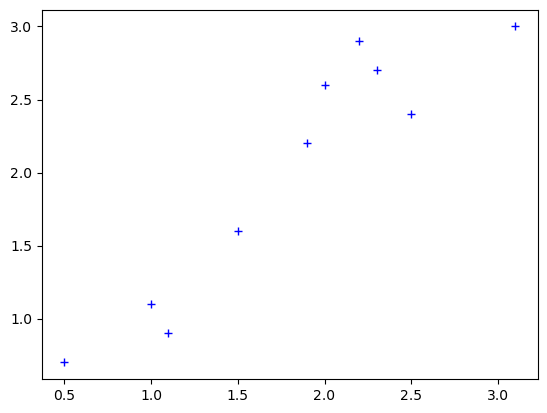

In [5]:
plt.plot(X[:,0], X[:,1],'b+')

In [6]:
means, sds = get_mean_std(X)
X = normalization(X, means=means, sds=None) # must: subtract the means; optional: divide by the standard deviation so variables with varying standard deviations get the same "importance"
print(means)
print(sds)
meansNew, sdsNew = get_mean_std(X)
print(meansNew)
print(sdsNew)

[1.81 2.01]
[0.7449161  0.82030482]
[-4.44089210e-17 -1.77635684e-16]
[0.7449161  0.82030482]


In [7]:
covariance_matrix = np.cov(np.transpose(X)) # because of the standardization this is equivalent to the correlation coefficient matrix
covariance_matrix

array([[0.61655556, 0.63655556],
       [0.63655556, 0.74766667]])

In [8]:
eigen_values, eigen_vectors = get_principal_components(covariance_matrix)
print("eigen_vectors:\n", eigen_vectors)
print("eigen_values:\n", eigen_values)

eigen_vectors:
 [[-0.66990932 -0.74244293]
 [-0.74244293  0.66990932]]
eigen_values:
 [1.32203338 0.04218885]


In [9]:
variances_explained = [v / np.sum(eigen_values) * 100 for v in eigen_values]
variances_explained

[96.90747997671139, 3.0925200232886096]

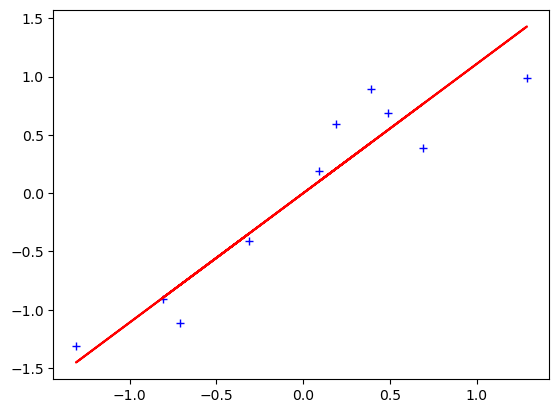

In [10]:
m = eigen_vectors[1,0] / eigen_vectors[0,0] # have: vector (x_1, x_2). Solve x_2 = x_1 m to get m (divide by x_1)
plt.plot(X[:,0], X[:,1],'b+')
plt.plot(X[:,0], m * X[:,0],'r-')
#m2 = eigen_vectors[1,1] / eigen_vectors[0,1]
# plt.plot(X[:,0], m2 * X[:,0],'g-',linewidth=0.1)

In [11]:
X_new = get_transformed_data(X, eigen_vectors, 1)
print(X_new.shape)
print(X_new)

(10, 1)
[[-0.75179017]
 [ 1.85018145]
 [-0.92203884]
 [-0.201356  ]
 [-1.59920152]
 [-0.84054119]
 [-0.5653241 ]
 [ 1.21824961]
 [ 0.51207349]
 [ 1.29974727]]


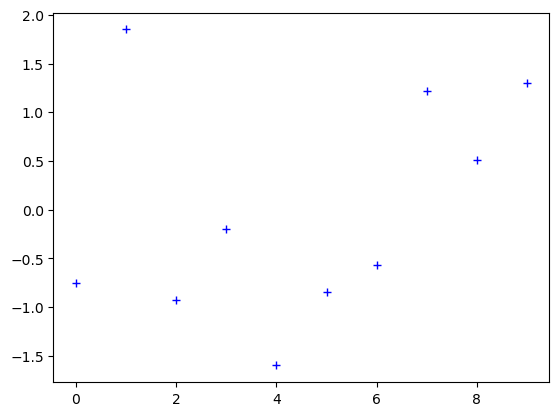

In [12]:
plt.plot(range(X_new.shape[0]), X_new[:,0],'b+')